## Fourier Series

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

#### The Square Function
Create a python function for the square function shown below.
This function has a period of $2\pi$ and alternates between $0$ and $1$.

<img width=600px src="SquareFunction.png">

In [2]:
def squareFunction(x):
    ### TO DO: Create a square function
    a = 0
    n = x // (2 * np.pi)
    new_x = x - (n * 2 * np.pi) 
    if ((new_x > np.pi) and (new_x < (2 * np.pi))):
        a = -1
    if ((new_x > 0) and (new_x < np.pi)):
        a = 1
    if ((new_x == 0) or (new_x == np.pi) or (new_x == np.pi * 2)):
        a = 0
    return a

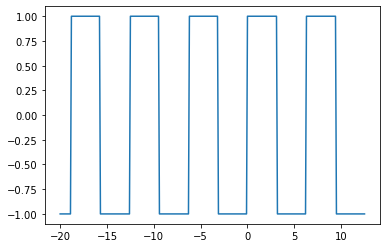

In [7]:
### TO DO: Plot the square function from (-4pi, 4pi)
x_array = []
y = []
i = -20
while i < 20:
    if (i <= (4 * np.pi)):
        x_array.append(i)
        y.append(squareFunction(i))
    i += 0.1
plt.plot(x_array, y)
plt.show()

Visually, verify your plot matches the graph in the image above.

#### The Sine Series
Create a function that returns the sum of the first $k$ elements of the fourier sine series. 

In [8]:
def fourierSineSeries(k, bk, x):
    """
    Returns the sum of the first k elements of the dourier sine series
    Parameters:
        k: the number of elements to summate
        bk: the coefficients of each element
        x: the x value to evaluate
    Returns:
        The S(x) approximation using the fourier sine series
    """
    ### TO DO: Create the fourier sine series sum
    sine = 0
    for i in range (k):
        sine += bk[i] * np.sin(i * x)
    return (sine)

#### Find the $b_k$ terms 
Using your square function and fourier sine series, find and plot the first 5, 10, and 100 $b_k$ terms for your square function. 

In order to find this coefficients, you'll have to use some integral function. I recommend using `quad` defined here: https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.quad.html

Recall the integral to find the $b_k$ coefficients is defined as:

$$b_k = \frac{2}{\pi} \int \limits^{\pi}_{0} S(x)sin(kx) dx $$

The quad function, and other pre-made integral functions take a function $f$ as a argument. In order to be able to give these integration functions a single function name, you may have to define an `integrand` function (provided below) that computes the value $S(x)sin(kx)$. 

In [12]:
def integrand(x, k):
    ### TO DO: Define S(x)sin(kx) integrand used to solve for the coefficients 
    return squareFunction(x) * np.sin(x * k)

In [14]:
## TO DO: Calculate the b_k coefficient values
bk_new = []
for k in range(100):
    x = quad(integrand, 0, np.pi, args = (k))[0] * (2 / np.pi)
    bk_new.append(x)

Plot the sum of the first 5 elements in the fourier sine series for the square wave function.

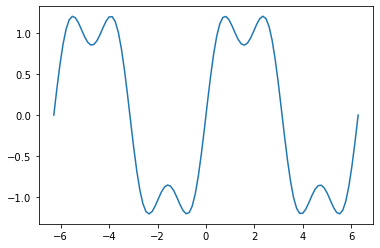

In [16]:
## TO DO: Plot the sum of the first 5 elements. 
x = np.linspace(-2 * np.pi, 2 * np.pi, 100)
y = fourierSineSeries(5, bk_new, x)
plt.plot(x, y)
plt.show()

Plot the sum of the first 10 elements in the fourier sine series for the square wave function.

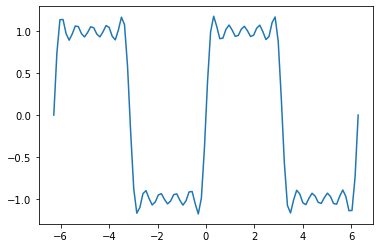

In [18]:
## TO DO: Plot the sum of the first 10coefficient  elements.
y2 = fourierSineSeries(10, bk_new, x)
plt.plot(x, y2)
plt.show()

Plot the sum of the first 100 elements in the fourier sine series for the square wave function.

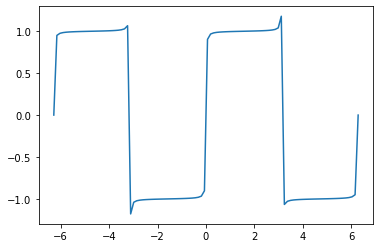

In [19]:
## TO DO: Plot the sum of the first 100 elements.
y3 = fourierSineSeries(100, bk_new, x)
plt.plot(x, y3)
plt.show()